In [28]:
from astropy.table import Table
from astropy.io import fits
from vtl.Photo import Photometry
from astropy.cosmology import Planck13, z_at_value
from spec_id import Median_w_Error_cont, Gen_spec, Scale_model
from scipy.interpolate import interp1d
from glob import glob
import seaborn as sea
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
colors = [(0,i,i,i) for i in np.linspace(0,1,3)]
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.2, as_cmap=True)

In [2]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
galDB = galDB.query('ids != 14713 and ids != 38126')

# goodss_fast = Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Fast/goodss_3dhst.v4.1.fout',
#                    format = 'ascii')
# goodsn_fast = Table.read('/Users/Vince.ec/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Fast/goodsn_3dhst.v4.1.fout',
#                    format = 'ascii')

# goodss_mag = Table.read('../../../Clear_data/goodss_mosaic/goodss_3dhst.v4.3.cat', format = 'ascii')
# goodsn_mag = Table.read('../../../Clear_data/goodsn_mosaic/goodsn_3dhstP.cat', format = 'ascii')


goodss_mag = Table.read('../../../Clear_data/goodss_3dhst.v4.3.cat', format = 'ascii')
goodsn_mag = Table.read('../../../Clear_data/goodsn_3dhst.v4.3.cat', format = 'ascii')

goodss_fast = Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodss_3dhst.v4.1.cats/Fast/goodss_3dhst.v4.1.fout',
                   format = 'ascii')
goodsn_fast = Table.read('/Users/vestrada/Desktop/catalogs_for_CLEAR/goodsn_3dhst.v4.1.cats/Fast/goodsn_3dhst.v4.1.fout',
                   format = 'ascii')

In [3]:
phot_db = pd.read_pickle('../data/phot_db.pkl')
Clam = 10**((-1.1)/2.5-29)

In [4]:
A_v = []
for i in galDB.index:
    if galDB['gids'][i][0] == 's':
        A_v.append(goodss_fast['Av'][galDB['ids'][i]-1])
        
    if galDB['gids'][i][0] == 'n':
        A_v.append(goodsn_fast['Av'][galDB['ids'][i]-1])


In [172]:
phot_db['s35774']['s_F105W']

-99.0

# adding IRAC data

In [5]:
filters_ID =[18, 19, 20, 21]
filter_fl = ['f_IRAC1', 'f_IRAC2', 'f_IRAC3', 'f_IRAC4']
filter_er = ['e_IRAC1', 'e_IRAC2', 'e_IRAC3', 'e_IRAC4']
wv,fl = np.load('../../../fsps_models_for_fit/fsps_spec/m0.019_a3.0_dt8.0_spec.npy')

In [7]:
phot = Photometry(wv,fl,fl,18)

eff_wv = np.zeros(4)
fwhm = np.zeros(4)

for i in range(len(filters_ID)):
    phot.Get_Sensitivity(filters_ID[i])
    phot.Photo()
    phot.Photo_model(wv,fl)
    phot.FWHM()

    eff_wv[i] = phot.eff_mwv
    fwhm[i] = phot.fwhm

In [8]:
print eff_wv

[ 35439.79810911  44839.15069197  57164.2277127   78285.06760846]


In [12]:
irac1, irac2, irac3, irac4 = [[],[],[],[]]
irac1_er, irac2_er, irac3_er, irac4_er = [[],[],[],[]]

A_v = []
for i in galDB.index:
    if galDB['gids'][i][0] == 's':
        irac1.append(goodss_mag['f_IRAC1'][galDB['ids'][i]-1])
        irac2.append(goodss_mag['f_IRAC2'][galDB['ids'][i]-1])
        irac3.append(goodss_mag['f_IRAC3'][galDB['ids'][i]-1])
        irac4.append(goodss_mag['f_IRAC4'][galDB['ids'][i]-1])
        irac1_er.append(goodss_mag['e_IRAC1'][galDB['ids'][i]-1])
        irac2_er.append(goodss_mag['e_IRAC2'][galDB['ids'][i]-1])
        irac3_er.append(goodss_mag['e_IRAC3'][galDB['ids'][i]-1])
        irac4_er.append(goodss_mag['e_IRAC4'][galDB['ids'][i]-1])
        A_v.append(goodss_fast['Av'][galDB['ids'][i]-1])
        
    if galDB['gids'][i][0] == 'n':
        irac1.append(goodsn_mag['f_IRAC1'][galDB['ids'][i]-1])
        irac2.append(goodsn_mag['f_IRAC2'][galDB['ids'][i]-1])
        irac3.append(goodsn_mag['f_IRAC3'][galDB['ids'][i]-1])
        irac4.append(goodsn_mag['f_IRAC4'][galDB['ids'][i]-1])
        irac1_er.append(goodsn_mag['e_IRAC1'][galDB['ids'][i]-1])
        irac2_er.append(goodsn_mag['e_IRAC2'][galDB['ids'][i]-1])
        irac3_er.append(goodsn_mag['e_IRAC3'][galDB['ids'][i]-1])
        irac4_er.append(goodsn_mag['e_IRAC4'][galDB['ids'][i]-1])
        A_v.append(goodsn_fast['Av'][galDB['ids'][i]-1])


In [14]:
print len(irac1)

35


In [17]:
IRone = [eff_wv[0],fwhm[0]]
IRtwo = [eff_wv[1],fwhm[1]]
IRthree = [eff_wv[2],fwhm[2]]
IRfour = [eff_wv[3],fwhm[3]]

for i in range(len(irac1)):
    IRone.append(irac1[i])
    IRone.append(irac1_er[i])
    
    IRtwo.append(irac2[i])
    IRtwo.append(irac2_er[i])
    
    IRthree.append(irac3[i])
    IRthree.append(irac3_er[i])
    
    IRfour.append(irac4[i])
    IRfour.append(irac4_er[i])

In [23]:
new_phot = pd.DataFrame([IRone,IRtwo,IRthree,IRfour],index=['IRAC_3.6','IRAC_4.5','IRAC_5.8','IRAC_8.0'],
                       columns = list(phot_db.columns))

In [25]:
new_phot = phot_db.append(new_phot)

In [171]:
# pd.to_pickle(phot_db,'../data/phot_db.pkl')

# photo plots

In [198]:
###PLOT

def Plot_phot(gid,rshift,AV,model =False, name=''):
    spec = Gen_spec(gid, rshift,maxwv=11450)
    Cnu = 10**((-1.1)/2.5-29)

    
    wv=spec.gal_wv[spec.gal_fl > 1E-21]
    fl=spec.gal_fl[spec.gal_fl > 1E-21]
    er=spec.gal_er[spec.gal_fl > 1E-21]
    
    phot_er = (phot_db['%s_err' % gid].values ) /((phot_db['%s' % gid].values  ) * np.log(10))
    conv = wv**2 / 3E18
    
    IDW = [U for U in phot_db.index if wv[0] < phot_db['eff_wv'][U] < wv[-1]]
    
    scale_phot=[]
    scale_effwv =[]  
  
    for i in range(len(IDW)):
        if phot_db['%s' % gid][IDW[i]] > 0:
            scale_phot.append(phot_db['%s' % gid][IDW[i]] * Cnu)
            scale_effwv.append(phot_db['eff_wv'][IDW[i]])

    scale_phot = np.array(scale_phot)
    scale_effwv = np.array(scale_effwv)

    IDX =np.array(scale_effwv).argsort()
    ispec = interp1d(wv,fl * conv)(scale_effwv[IDX])
    ierr = interp1d(wv,er * conv)(scale_effwv[IDX])

    C = Scale_model(ispec,ierr,np.array(scale_phot[IDX]))
 
    if model == True:
    
        mwv,mfl = np.load('../../../fsps_models_for_fit/fsps_spec/m0.02_a2.1_dt8.48_spec.npy')
        imfl = interp1d(mwv*(1+rshift),mfl)(wv)
        Cm = Scale_model(fl/C, er/C, imfl)
        mconv = (mwv*(1+rshift))**2 / 3E18

    good_phot=[]
    for i in phot_db['%s' % gid].values:
        if i >0:
            good_phot.append(i)
    good_phot = np.array(good_phot)        
    
    ymax = max(np.log10(good_phot * Cnu))
    ymin = min(np.log10(good_phot * Cnu))

    #################################
    plt.figure(figsize=[17,6])
    
    plt.plot(np.log10(wv*1E-4),np.log10(fl * conv /C),'o',
        color = '#377eb8', ms=2,label = '%s, z=%s, A$_v$=%s' % (gid,rshift,AV))
  
#     plt.errorbar(np.log10(phot_db['eff_wv']*1E-4),np.log10(phot_db['%s' % gid] * Cnu) ,phot_er,
#                  np.log10(phot_db['fwhm']*1E-4)/(2),color='#BC344F',fmt='D',label='Broad-Band Photometry')
   
  
    plt.errorbar(np.log10(phot_db['eff_wv']*1E-4),np.log10(phot_db['%s' % gid] * Cnu) ,phot_er,
                 color='#BC344F',fmt='D',label='Broad-Band Photometry')

    if model == True:
        plt.plot(np.log10(mwv*1E-4*(1+rshift)),np.log10(mfl * mconv * Cm), color = 'k',label = 'model')
        
    plt.ylim(ymin*1.01,ymax*0.99)
    plt.xlim(-.75,1.25)
    plt.minorticks_on()
    plt.ylabel('log(F$_\\nu$)',size=35)
    plt.tick_params(axis='both', which='major', labelsize=25)
    plt.xlabel('Observed Wavelength (log($ \mu m$))',size=35)
    plt.legend(loc=4,fontsize = 25)
    plt.gcf().subplots_adjust(bottom=0.235)
    plt.savefig('../plots/%s.png' % name,bbox_inches = 'tight')

../data/galaxy_flts/n21156_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n21156_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n21156_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n21156_flt: save ../data/galaxy_flts/n21156_flt.detect_seg.fits, ../data/galaxy_flts/n21156_flt.detect.cat


/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in log10


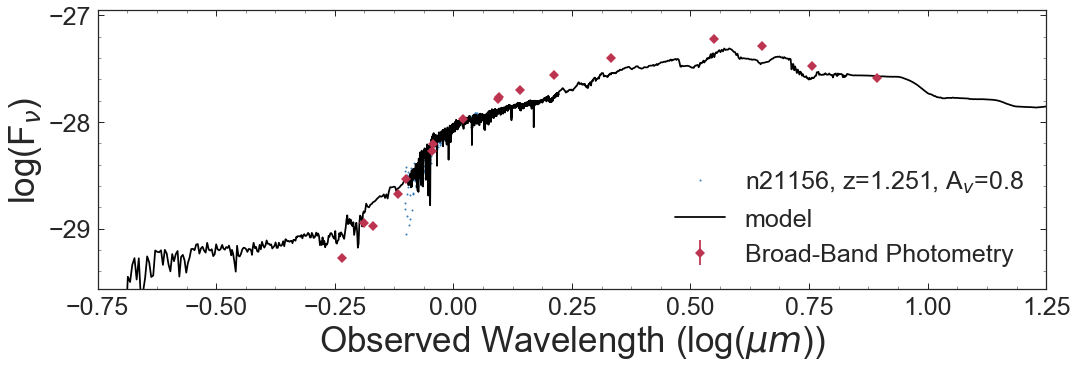

In [199]:
Plot_phot('n21156',1.251,.8,model =True,name = 'n21156_allphot_w_model')

/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()


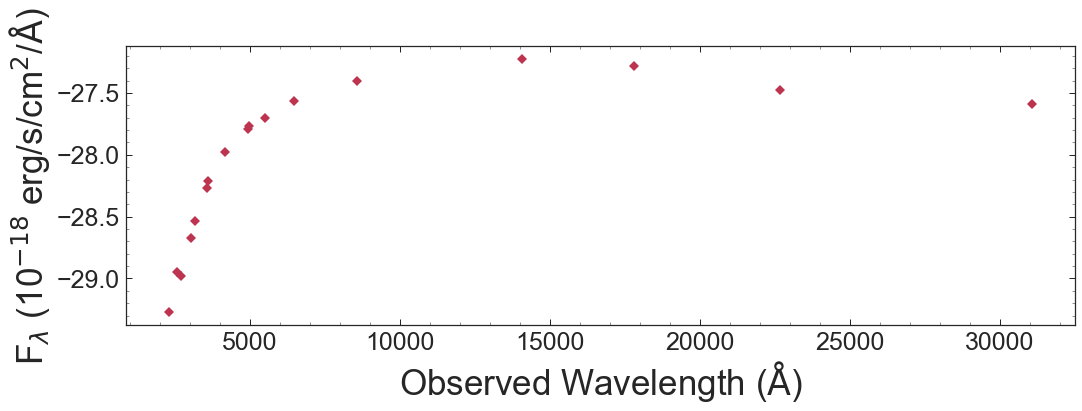

In [8]:
%matplotlib inline    

plt.figure(figsize=[17,6])
# plt.errorbar(spec.gal_wv,spec.gal_fl * 1E18,spec.gal_er * 1E18,fmt='o',
# color = '#377eb8', ms=2,elinewidth=1,label = 'GND21156, z=1.251')


# plt.errorbar(phot_db['eff_wv'],np.log10(phot_db['n21156'] * Clam) ,np.log10(phot_db['n21156_err'] * Clam),
#              phot_db['fwhm']/2 ,color='#BC344F',fmt='D',label='Broad-Band Photometry')

plt.plot(phot_db['eff_wv']/2.52,np.log10(phot_db['n21156'] * Clam),'D',
         color='#BC344F',label='Broad-Band Photometry')
# plt.ylim(0,-27)
# plt.xlim(7500,11350)
plt.minorticks_on()
plt.ylabel('F$_\lambda$ (10$^{-18}$ erg/s/cm$^2$/$\\rm \AA$)',size=35)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.xlabel('Observed Wavelength ($ \\rm \AA$)',size=35)
# plt.legend(loc=4,fontsize = 25)
plt.gcf().subplots_adjust(bottom=0.235)

../data/galaxy_flts/n16758_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n16758_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n16758_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n16758_flt: save ../data/galaxy_flts/n16758_flt.detect_seg.fits, ../data/galaxy_flts/n16758_flt.detect.cat


/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in log10


../data/galaxy_flts/n17070_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n17070_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n17070_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n17070_flt: save ../data/galaxy_flts/n17070_flt.detect_seg.fits, ../data/galaxy_flts/n17070_flt.detect.cat
../data/galaxy_flts/n19442_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n19442_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n19442_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n19442_flt: save ../data/galaxy_flts/n19442_flt.detect_seg.fits, ../dat

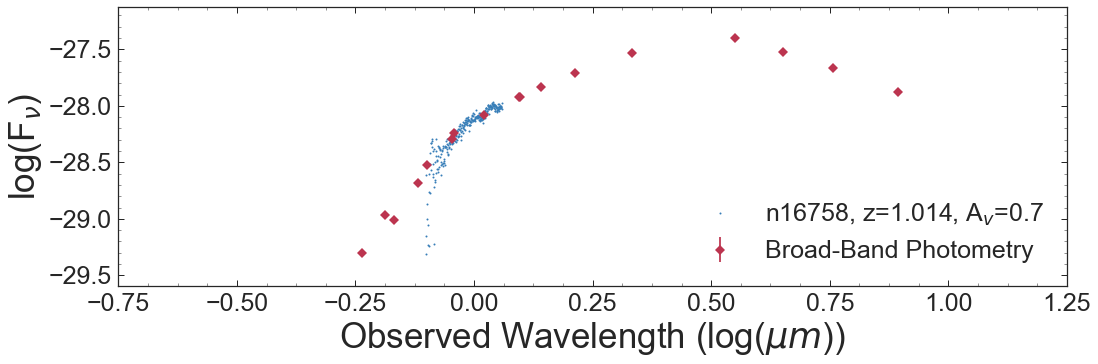

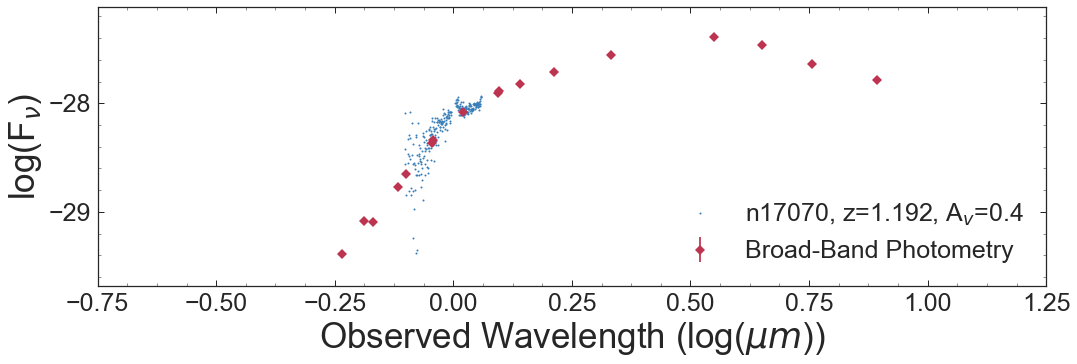

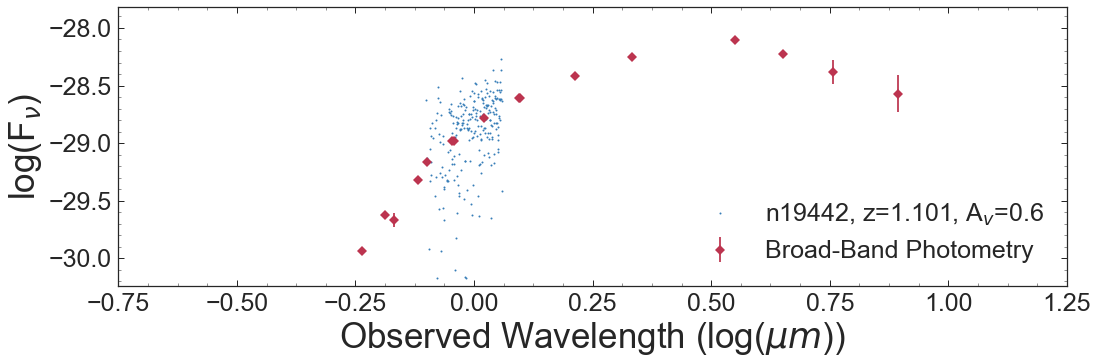

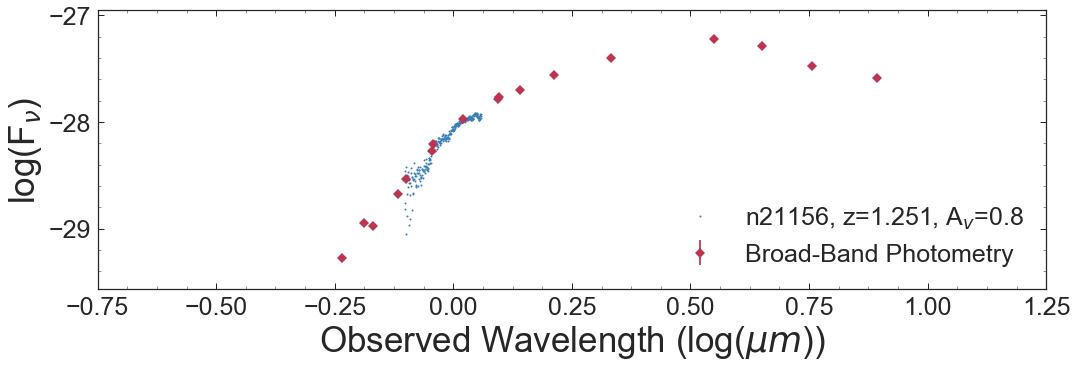

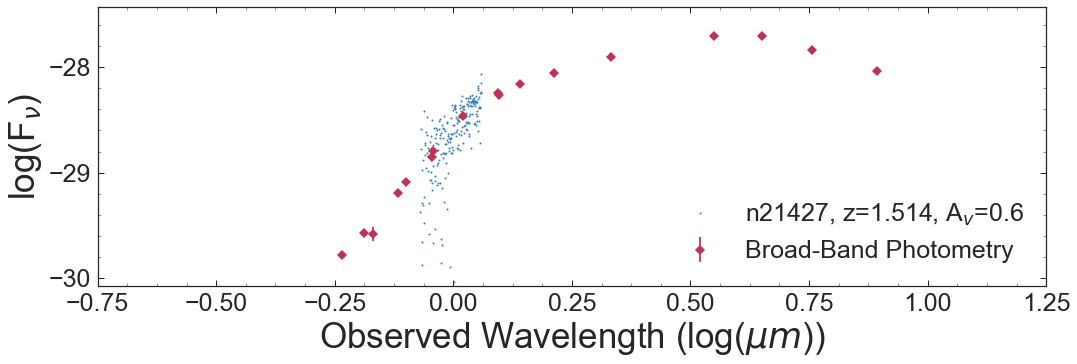

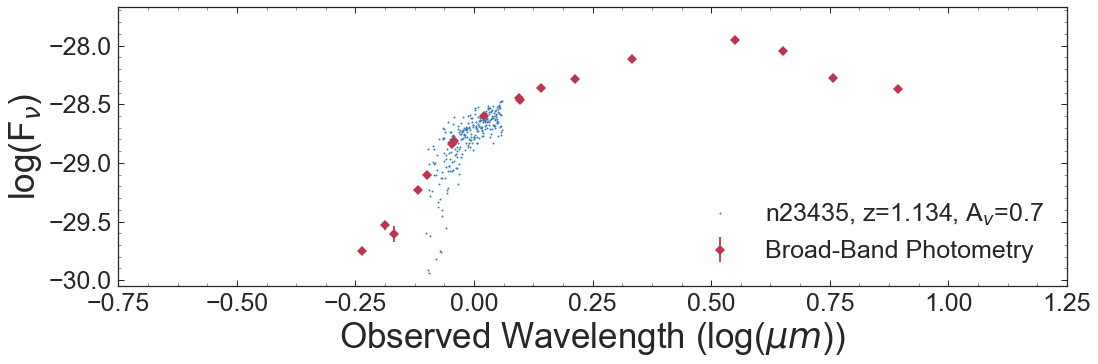

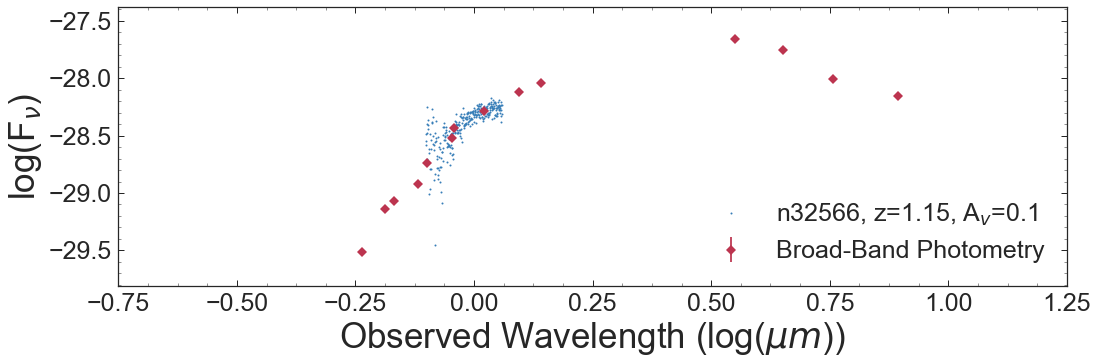

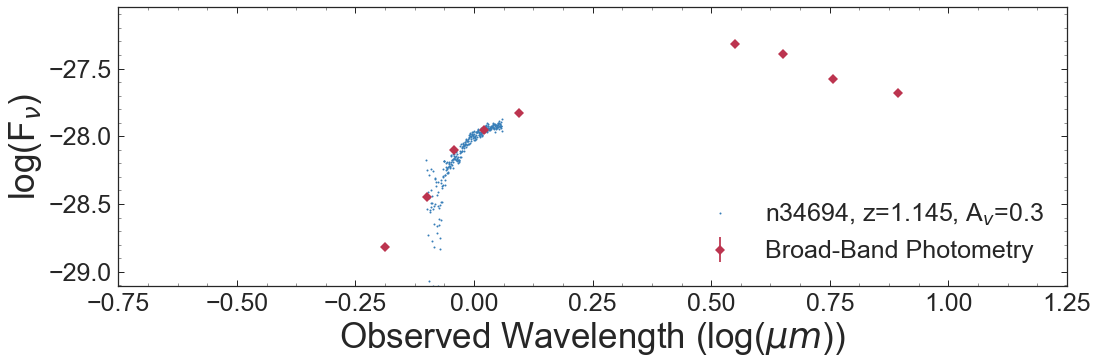

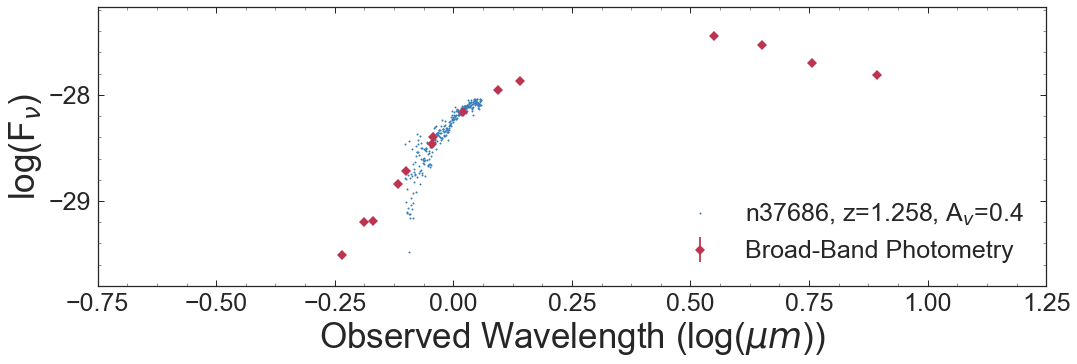

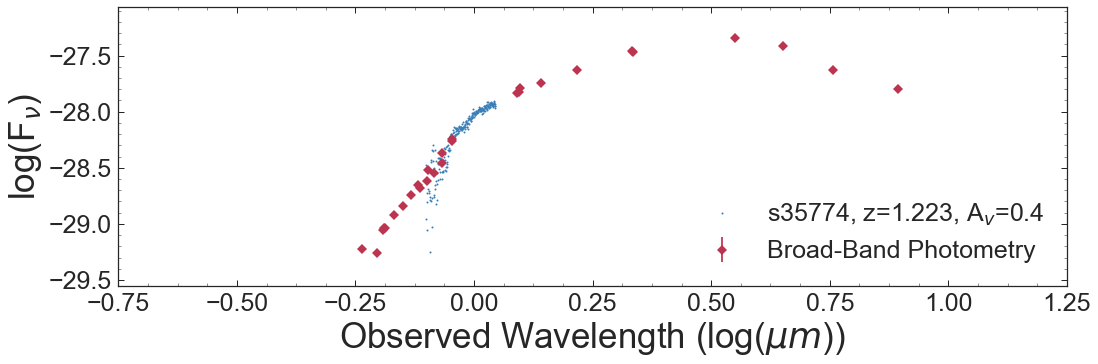

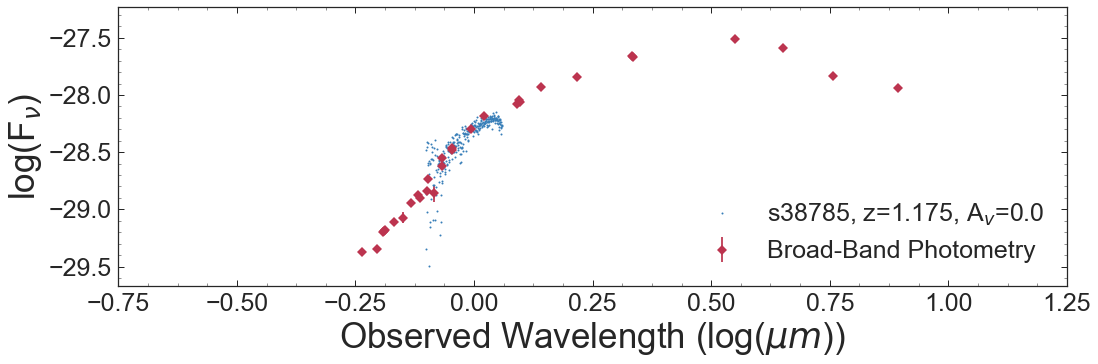

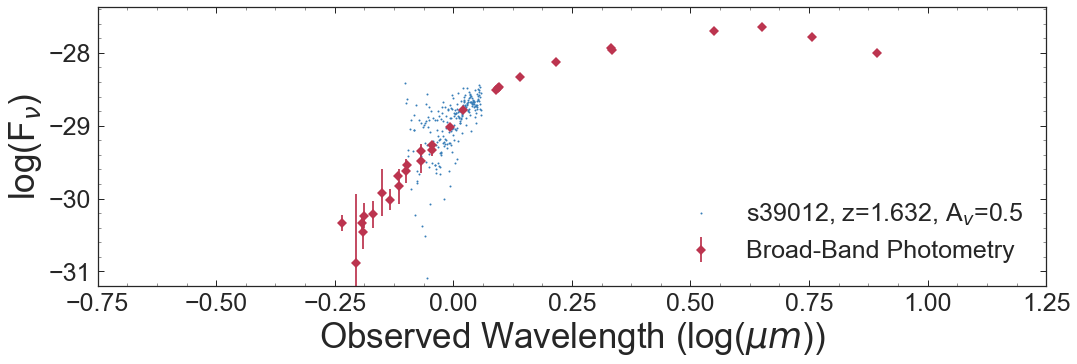

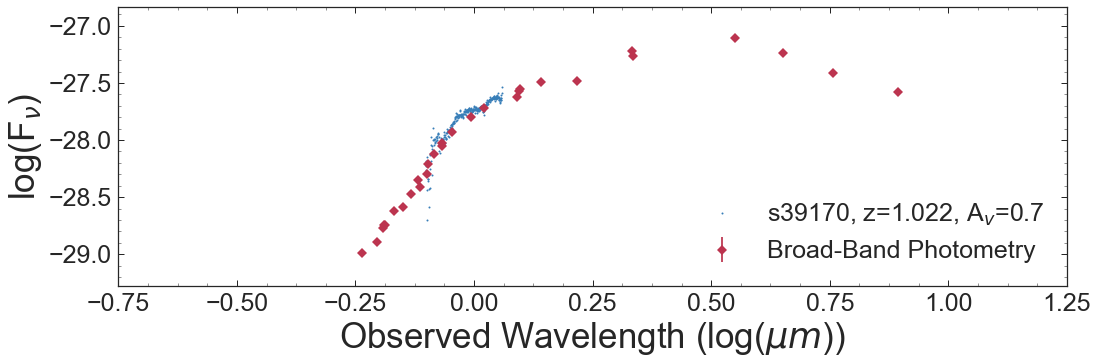

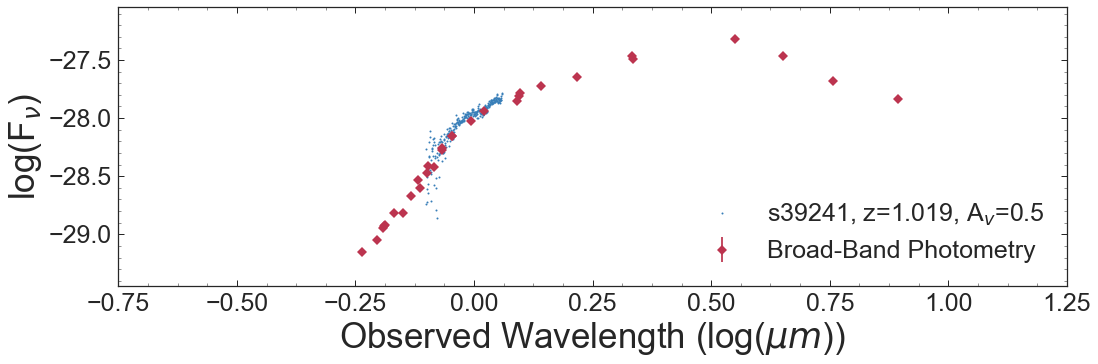

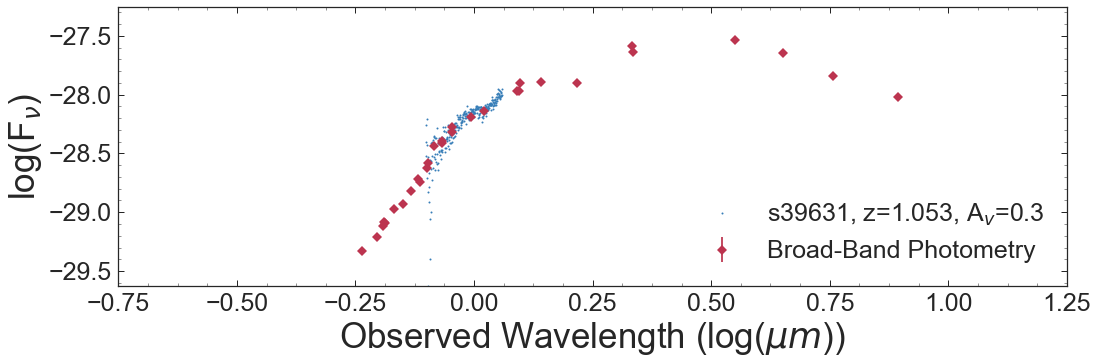

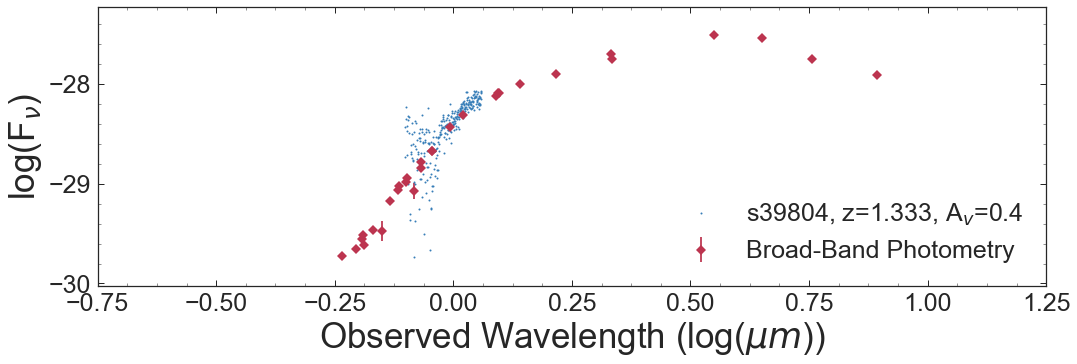

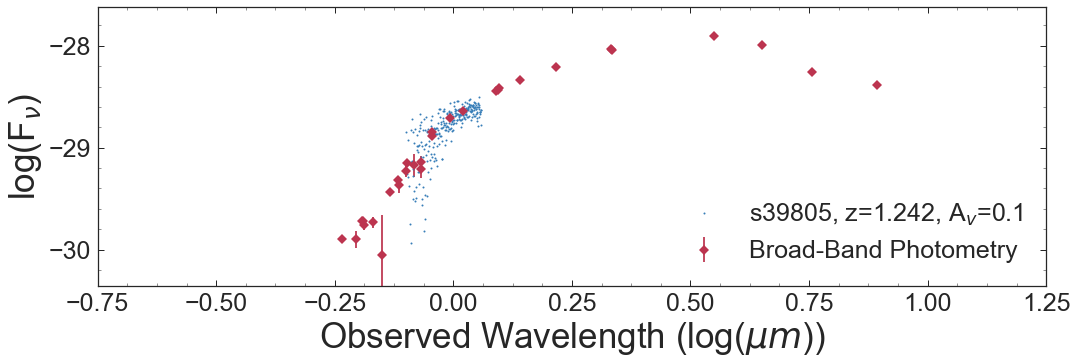

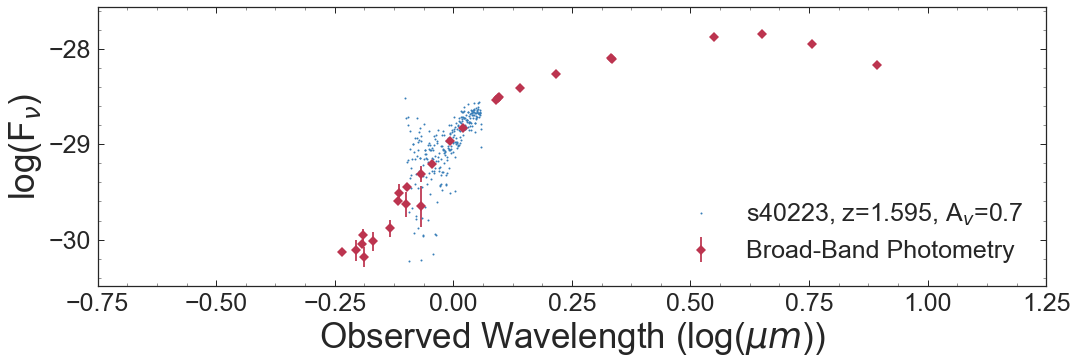

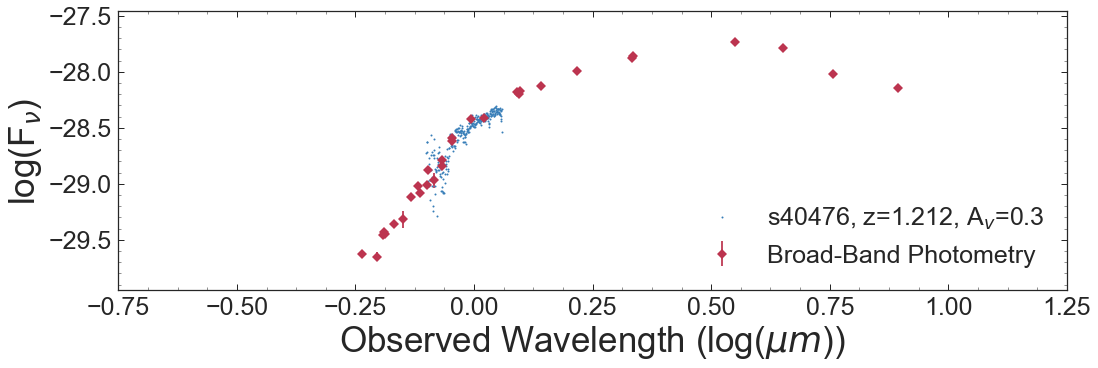

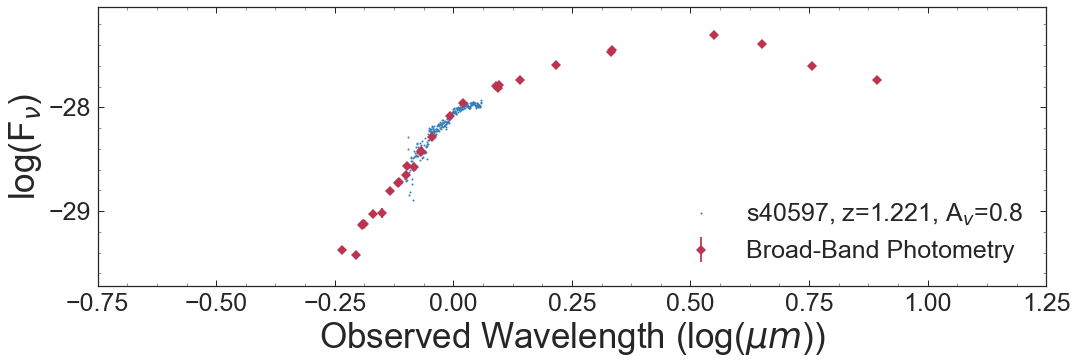

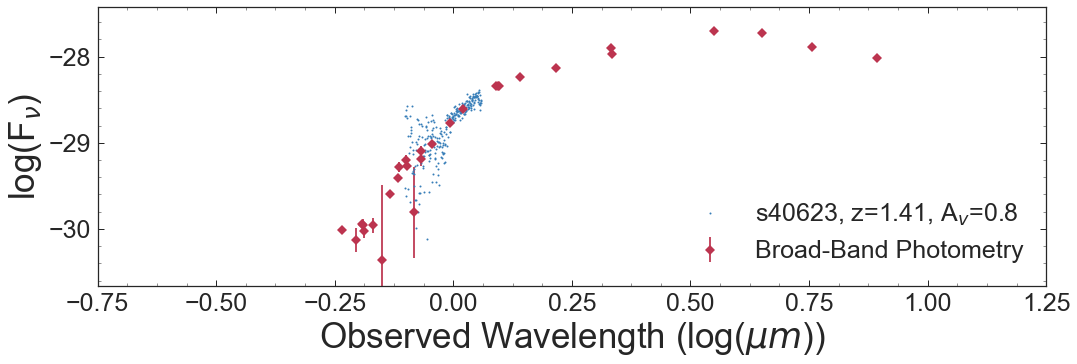

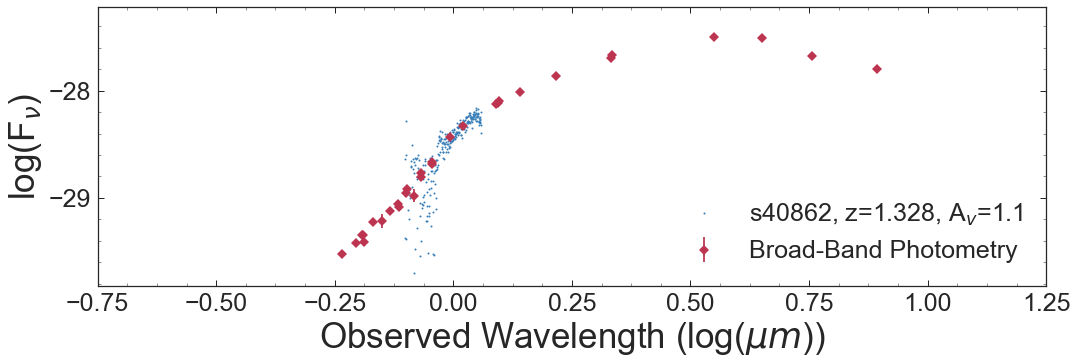

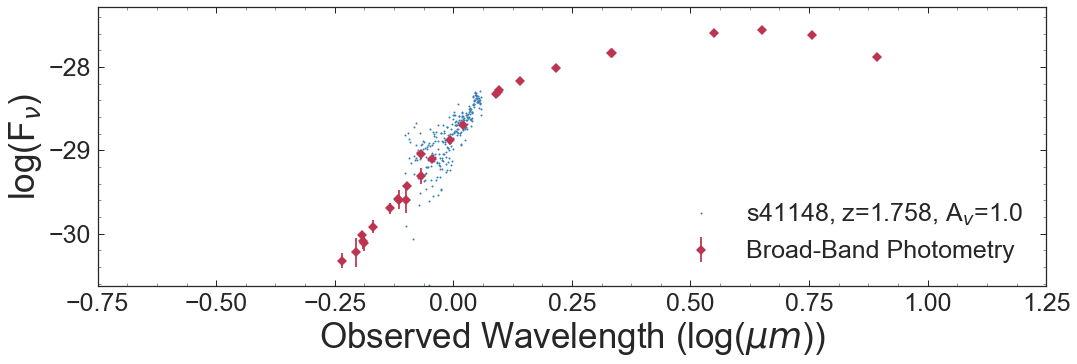

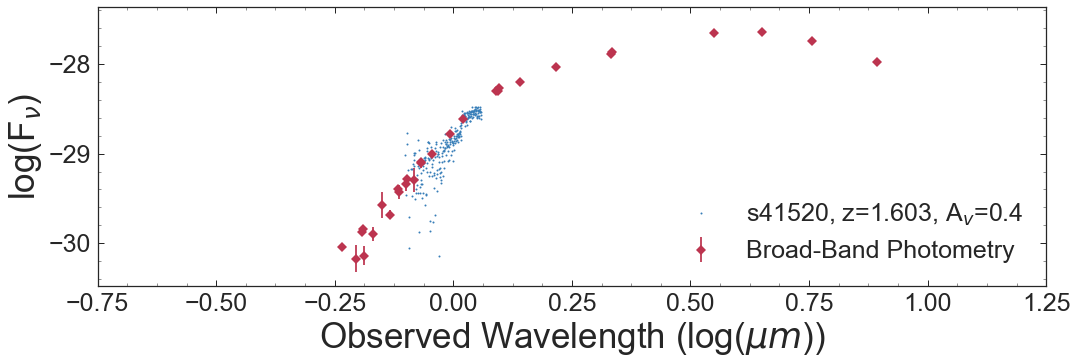

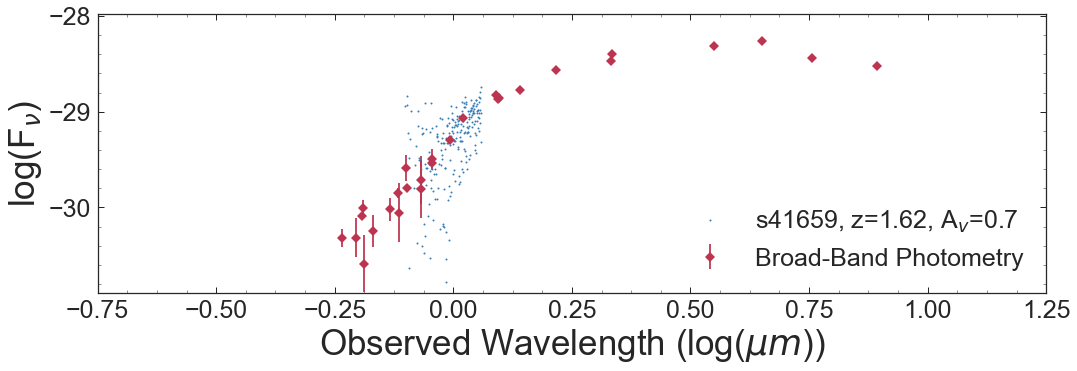

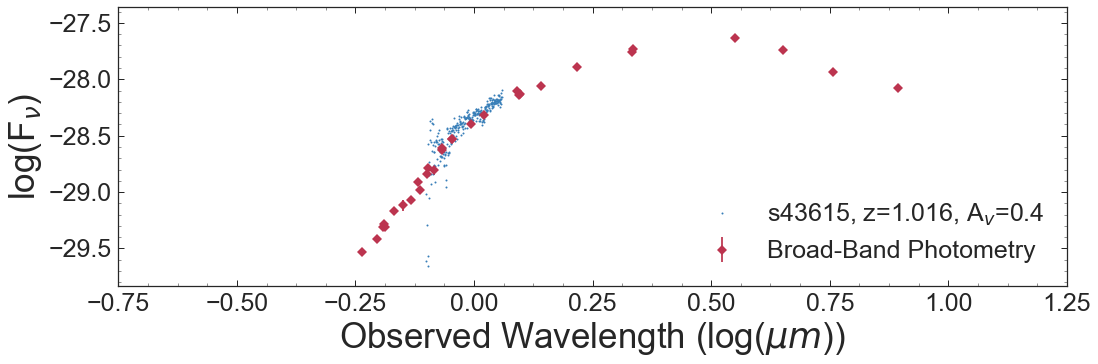

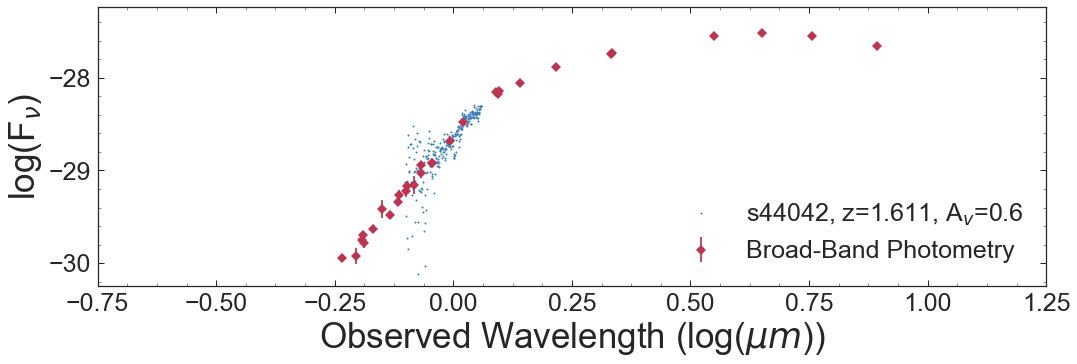

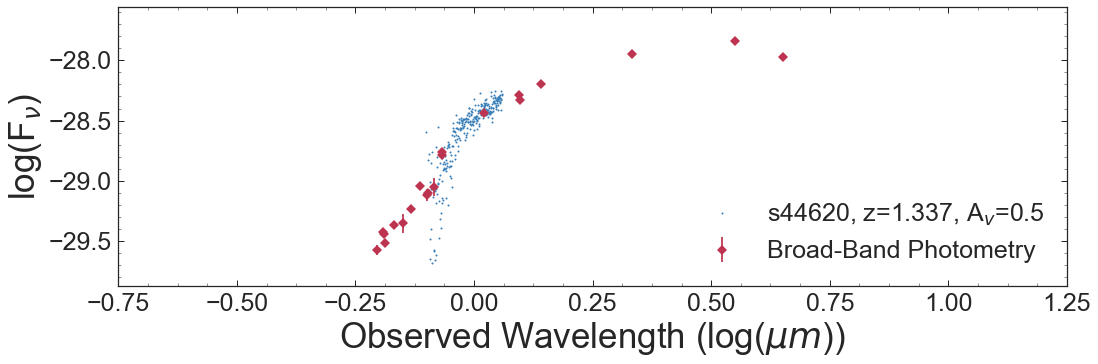

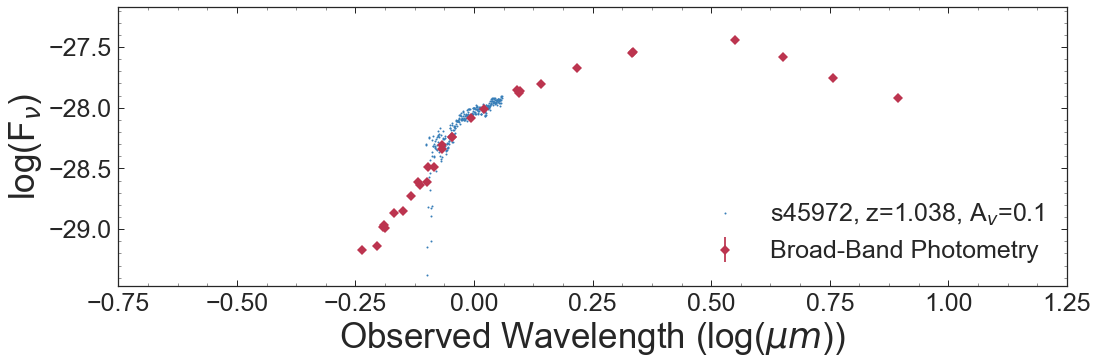

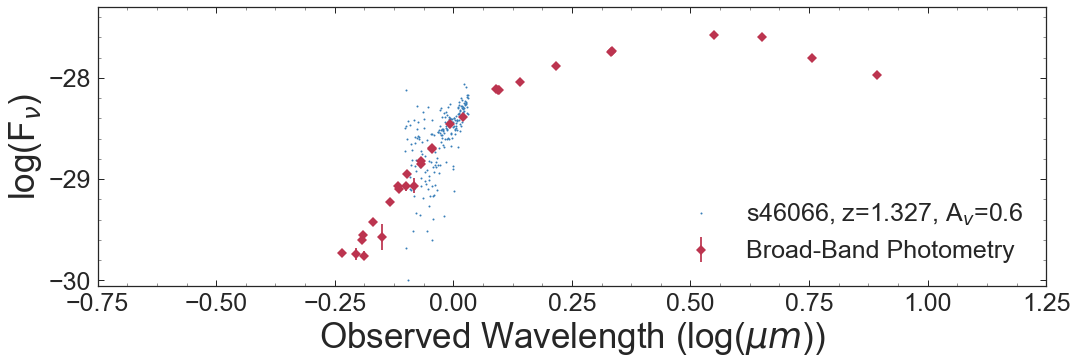

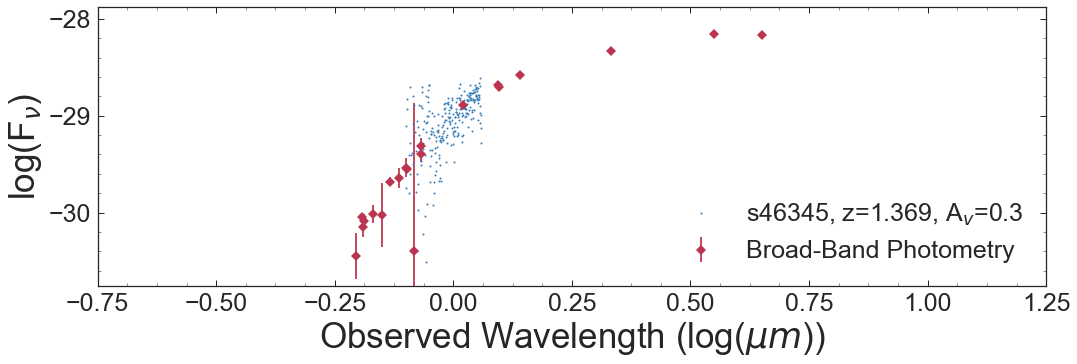

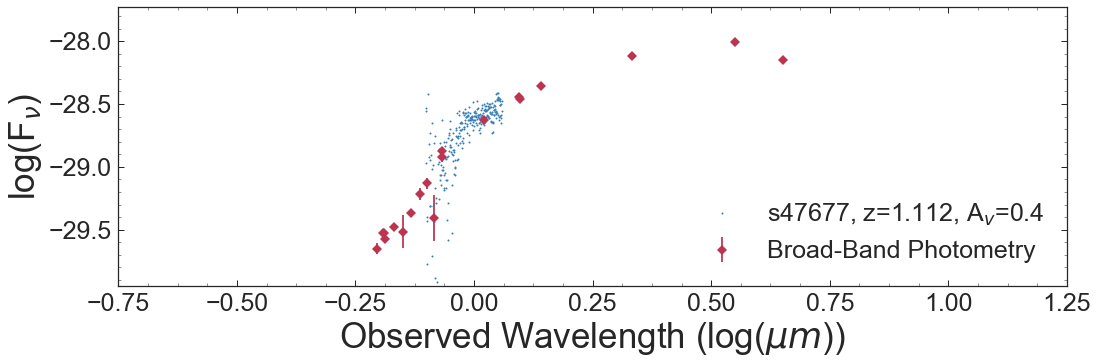

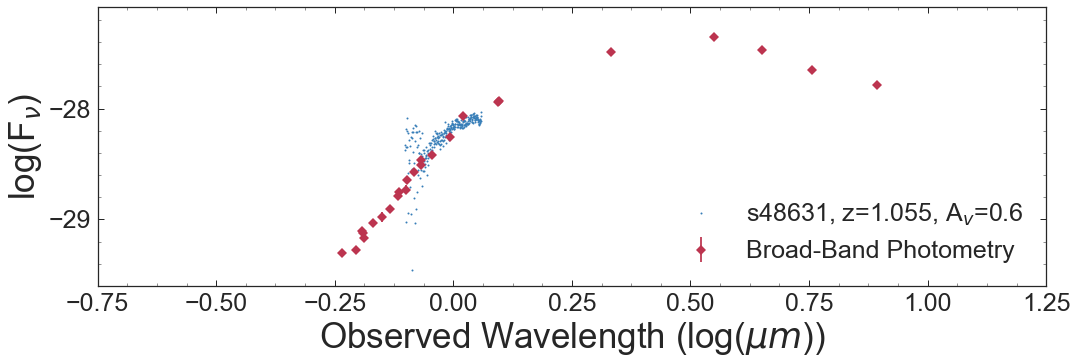

In [200]:
for i in range(len(galDB.index)):
    Plot_phot(galDB['gids'][galDB.index[i]],galDB['hi_res_specz'][galDB.index[i]],A_v[i],name = '%s_allphot' % galDB['gids'][galDB.index[i]])

In [174]:
mwv,mfl = np.load('../../../fsps_models_for_fit/fsps_spec/m0.02_a2.1_dt8.48_spec.npy')
mconv = (mwv**2 / 3E18)

(0, 9)

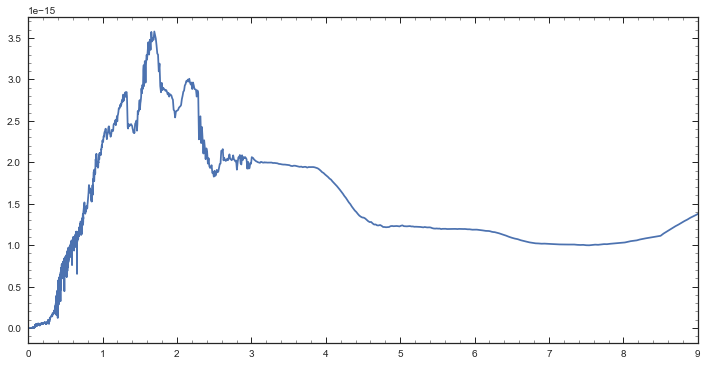

In [182]:

plt.figure(figsize=[12,6])

plt.plot(mwv*1E-4,mfl*mconv)
plt.xlim(0,9)